<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/marco-canas/didactica_ciencia_datos/blob/main/1_curso_machine_learning/7_models/1_modelo_general_clase_aula_invertida.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
</table>

### [Video de apoyo a la lectura interactiva y experimental de este cuaderno]()

## [Vínculo al programa del curso:  ]()



Un reconocimiento a mis estudiantes que han construido conmigo este saber pedagógico:

<img src = ''> 



# Llamar a lista o tomar asistencia con python o llamar el equipo para la tarea con video y cuaderno Jupyter sobre medición indirecta de grandes alturas con imágenes

In [2]:
import pandas as pd
import random

# Cargar la lista de estudiantes desde la URL
url = 'https://raw.githubusercontent.com/marco-canas/groups_list/main/seminario_didactica_aritmetica.csv'
estudiantes = pd.read_csv(url)

# Función para llamar a un estudiante aleatoriamente y registrar su nota de seguimiento
def llamar_estudiante():
    estudiante_aleatorio = random.choice(estudiantes['Nombre'])
    print(f"Llamando a {estudiante_aleatorio}...")
    
    
# Llamar a la función para realizar el proceso
llamar_estudiante()


Llamando a BOHORQUEZ NAVARRO DINA ESTELA...


# Modelo general de clase: [aula invertida](https://www3.gobiernodecanarias.org/medusa/ecoescuela/pedagotic/aprendizaje-invertido-flipped-classroom/)

![Definamos flipped learning de manera gráfica](https://resources.maneuveringthemiddle.com/wp-content/uploads/2020/07/04212706/1-5.png)

## Fomento de la lectura literaria asociada a Ingeniería agropecuaria y licenciatura en Matemáticas


[MARSHALL ROSENBERG](https://udeaeduco-my.sharepoint.com/:b:/g/personal/marco_canas_udea_edu_co/Efb_5fC50D5JnA4BzTKzgsIB9UeMjgs1kCU-sROZDlWTGw?e=gjRMdZ)

## Título de la clase: Linear SVM Classification 

Page 287 de Géron: Hands on Machine Learning with SkLearn, Keras and TensorFlow.   





### Objetivo de aprendizaje (Enunciar, de manera corta sencilla y clara para todos los asistentes)

* 

## Cuestionario para realizar labores de memorización, observación y síntesis de la información (Además de diagnóstico)

1. ¿?
2. ¿?
3. ¿?
4. ¿?
5. ¿?

## Establecimiento de prerrequisitos conceptuales para alcanzar el objetivo de aprendizaje trazado.   

(Elabore una lista de preguntas al rededor de los conceptos que consideres necesarios para empezar la clase).  

1. 
2. 
3. 

# Para el diseño de la clase tenga en cuenta algunos problemas de aprendizaje

## Secuencia conceptual introductoria a la clase

## El componente histórico y epistemológico

## Associated vocabulary  

* behind: detras. 
* explained: explicado. 

 # Linear SVM Classification 

Page 287 de Géron: Hands on Machine Learning with SkLearn, Keras and TensorFlow.   


The fundamental idea behind SVMs is best explained with some visuals.


Figure 5-1 shows part of the iris dataset that was introduced at the end of Chapter 4. 

The two classes can clearly be separated easily with a straight line (they are linearly separable). 

The left plot shows the decision boundaries of three possible linear classifiers. The model whose decision boundary is represented by the dashed line is so bad that it does not even separate the
classes properly. 

The other two models work perfectly on this training set,
but their decision boundaries come so close to the instances that these models
will probably not perform as well on new instances. In contrast, the solid line
in the plot on the right represents the decision boundary of an SVM classifier;
this line not only separates the two classes but also stays as far away from the
closest training instances as possible. You can think of an SVM classifier as
fitting the widest possible street (represented by the parallel dashed lines)
between the classes. This is called large margin classification.

In [4]:
import pandas as pd 
url = 'https://raw.githubusercontent.com/marco-canas/didactica_ciencia_datos/main/3_datasets/antioquia_mira_su_cielo/datos_caucasia_desde_junio_1_2023_hasta_2024-04-25.csv'
df = pd.read_csv(url, parse_dates = ['fecha'])

df.set_index('fecha', inplace = True)

df.head() 


,Unnamed: 0,nombre_completo,estado,temperatura,presion,humedad_relativa,precipitacion
fecha,,,,,,,
2023-06-18 03:46:01,0,UdeA Caucasia,Habilitada,23.66667,1010.56621,95,0.0
2023-06-08 19:30:00,1,UdeA Caucasia,Habilitada,27.66667,1011.88690,88,0.0
2023-06-08 19:31:00,2,UdeA Caucasia,Habilitada,27.61111,1011.88690,88,0.0
2023-06-08 19:32:00,3,UdeA Caucasia,Habilitada,27.61111,1011.88690,88,0.0
2023-06-08 19:33:00,4,UdeA Caucasia,Habilitada,27.61111,1011.88690,89,0.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 312434 entries, 2023-06-18 03:46:01 to 2024-04-23 20:29:01
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        312434 non-null  int64  
 1   nombre_completo   312434 non-null  object 
 2   estado            312434 non-null  object 
 3   temperatura       312434 non-null  float64
 4   presion           312434 non-null  float64
 5   humedad_relativa  312434 non-null  int64  
 6   precipitacion     312434 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 19.1+ MB


In [11]:
df = df[['temperatura', 'presion']]
df 

,temperatura,presion
fecha,,
2023-06-18 03:46:01,23.66667,1010.56621
2023-06-08 19:30:00,27.66667,1011.88690
2023-06-08 19:31:00,27.61111,1011.88690
2023-06-08 19:32:00,27.61111,1011.88690
2023-06-08 19:33:00,27.61111,1011.88690
...,...,...
2024-04-23 20:25:01,28.55556,1009.27938
2024-04-23 20:26:01,28.50000,1009.34711
2024-04-23 20:27:01,28.50000,1009.34711


In [12]:
X = df.values
X 

array([[  23.66667, 1010.56621],
       [  27.66667, 1011.8869 ],
       [  27.61111, 1011.8869 ],
       ...,
       [  28.5    , 1009.34711],
       [  28.5    , 1009.38097],
       [  28.5    , 1009.38097]])

In [26]:
import numpy as np 
np.random.seed(1213)
valores_variable_objetivo = np.array([0,1])
y = np.random.choice(a = valores_variable_objetivo, size = len(df), replace = True, p = [0.1, 0.90])
y 

array([1, 1, 1, ..., 1, 1, 1])

In [7]:
len(y)

312434

## Visualización de las dos clases



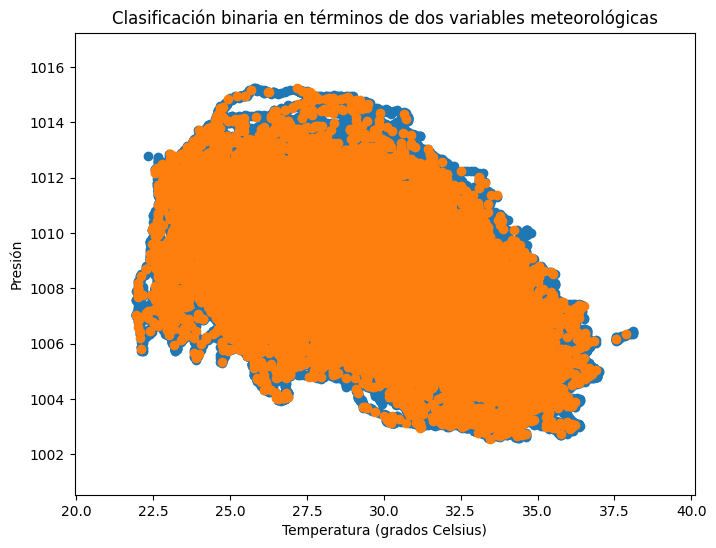

In [27]:
import matplotlib.pyplot as plt 

fig = plt.figure(figsize = (8, 6)) 

plt.title('Clasificación binaria en términos de dos variables meteorológicas')

plt.xlabel('Temperatura (grados Celsius)')
plt.ylabel('Presión')

plt.axis([np.min(X[:, 0])-2, np.max(X[:,0])+2, np.min(X[:, 1])-2, np.max(X[:,1]) + 2 ])

plt.scatter(X[:,0][y == 1], X[:,1][y==1]) # graficación de la clase positiva

plt.scatter(X[:,0][y == 0], X[:,1][y==0]) # graficación de la clase negativa

## Tareas para realizar antes de la clase  

1. Ver los videos respectivos []()
2. Memorizar las definiciones []()
3. Sintetizar o resumir la información en mapas conceptuales. []()
4. Tareas para incentivar el uso de la calculadora Casio Para ingenieros y licenciados. 
5. Leer los ejemplos resueltos y repricar la manera de hacerlos

In [1]:
from graphviz import Digraph

# Crear un nuevo grafo dirigido
dot = Digraph()

# Añadir nodos y relaciones al grafo
main_concept = 'SVM'
dot.node('A', main_concept)
dot.node('B', '')
dot.node('C', '')
dot.node('D', '')
dot.node('E', '')
dot.node('F', '')
dot.node('G', 'Micro:Bit')
dot.node('H', 'MakeCode')
dot.node('I', 'Flowgorithm')
dot.node('J', 'Conceptos Matemáticos')

dot.edges(['AB'])
dot.edges(['BC'])
dot.edges(['CD'])
dot.edges(['DJ'])
dot.edges(['EF'])
dot.edges(['FG', 'FH'])
dot.edges(['GH'])
dot.edges(['HI'])
dot.edges(['IJ'])

# Guardar el grafo como un archivo de imagen
dot.render('mapa_conceptual', format='png', cleanup=True, \
           directory = '/home/marco/Documentos/investigacion/didactica_ciencia_datos/4_images/2_images_of_referents/geron/5_chapter_svm')

dot.view()


'/home/marco/Documentos/investigacion/didactica_ciencia_datos/4_images/2_images_of_referents/geron/5_chapter_svm/mapa_conceptual.pdf'

/snap/core20/current/lib/x86_64-linux-gnu/libstdc++.so.6: version `GLIBCXX_3.4.29' not found (required by /lib/x86_64-linux-gnu/libproxy.so.1)
Failed to load module: /home/marco/snap/code/common/.cache/gio-modules/libgiolibproxy.so

(process:6860): Gtk-WARNING **: 20:42:34.018: Locale not supported by C library.
	Using the fallback 'C' locale.
/home/marco/snap/code/common/.cache/gio-modules/libgiolibproxy.so: cannot open shared object file: Permission denied
Failed to load module: /home/marco/snap/code/common/.cache/gio-modules/libgiolibproxy.so

(evince:6860): Gtk-WARNING **: 20:42:34.074: Theme parsing error: gtk-keys.css:1:0: Failed to import: Error opening file /snap/code/158/usr/share/themes/Default/gtk-3.0/gtk-keys.css: Permission denied
Gtk-Message: 20:42:34.074: Failed to load module "canberra-gtk-module"
Gtk-Message: 20:42:34.075: Failed to load module "canberra-gtk-module"
/home/marco/snap/code/common/.cache/gio-modules/libdconfsettings.so: cannot open shared object file: Per

In [ ]:
# asignación de ejercicios de un seccion del texto guía

# numpy.random.choice() obten la documentación de esta función en: 
# https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html

import pandas as pd
import numpy as np
import requests
np.random.seed(42)  # establecer semilla aleatoria para hacer los resultados reproducibles



grupo_estudiantes = 'calculo_integral'
nombre_texto_guia = 'Purcell'
pagina_y_seccion = 'Página_202_Sección_3.8'
numero_ejercicios_taller = 54
numero_de_ejercicios_asignados = 3


# Descargar la lista de  estudiantes
students_url = "https://raw.githubusercontent.com/marco-canas/groups_list/main/" + grupo_estudiantes + ".csv"
exercises = list(range(1, numero_ejercicios_taller))  

students_data = pd.read_csv(students_url)

# Crear una lista para almacenar las asignaciones
assignments = []

# Asignar ejercicios aleatorios a cada estudiante
for index, student in students_data.iterrows():
    # Seleccionar 5 ejercicios aleatorios sin repetición
    random_exercises = np.random.choice(exercises, numero_de_ejercicios_asignados, replace = False)+ 1 
    assignments.append([students_data["Nombre"][index], *random_exercises])  # Agregar asignación a la lista

# Crear un DataFrame con las asignaciones
columns = ["Student"] + [ "Exer" + str(i+1) for i in range(numero_de_ejercicios_asignados)]
assignment_df = pd.DataFrame(assignments, columns=columns)

# Guardar el DataFrame en un archivo CSV
assignment_csv = "tarea" + "_" + nombre_texto_guia + "_"+ pagina_y_seccion + ".csv"
assignment_df.to_csv(assignment_csv, index=False)

print("Tarea asignada: ", assignment_csv)
assignment_df

# Visualizaciones tabulares y gráficas

## Visualización gráfica con plotly

In [4]:
import numpy as np 
import pandas as pd 
import plotly.express as px
# datos
X = np.array([])

Y = np.array([])

# tabla de datos
tabla = pd.DataFrame({'x':X, 'y':Y})
#trazo de diagrama de dispersión o scatter
fig = px.scatter(tabla,x = tabla.keys()[0], y = tabla.keys()[1], title='Relación entre x e y')

fig.show()

#fig.write_html('relacion_entre_x_e_y.html', auto_open=True)

# Tareas para realizar en clase

* Modelación matemática 
* Trabajo en equipos

In [5]:
# asignación de ejercicios de un seccion del texto guía

# numpy.random.choice() obten la documentación de esta función en: 
# https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html

import pandas as pd
import numpy as np
import requests
np.random.seed(42)  # establecer semilla aleatoria para hacer los resultados reproducibles



grupo_estudiantes = 'calculo_integral'
nombre_texto_guia = 'Purcell'
pagina_y_seccion = 'Página_202_Sección_3.8'
numero_ejercicios_taller = 54
numero_de_ejercicios_asignados = 1


# Descargar la lista de  estudiantes
students_url = "https://raw.githubusercontent.com/marco-canas/groups_list/main/" + grupo_estudiantes + ".csv"
exercises = list(range(1, numero_ejercicios_taller))  

students_data = pd.read_csv(students_url)

# Crear una lista para almacenar las asignaciones
assignments = []

# Asignar ejercicios aleatorios a cada estudiante
for index, student in students_data.iterrows():
    # Seleccionar 5 ejercicios aleatorios sin repetición
    random_exercises = np.random.choice(exercises, numero_de_ejercicios_asignados, replace = False)+ 1 
    assignments.append([students_data["Nombre"][index], *random_exercises])  # Agregar asignación a la lista

# Crear un DataFrame con las asignaciones
columns = ["Student"] + [ "Exer" + str(i+1) for i in range(numero_de_ejercicios_asignados)]
assignment_df = pd.DataFrame(assignments, columns=columns)

# Guardar el DataFrame en un archivo CSV
assignment_csv = "tarea" + "_" + nombre_texto_guia + "_"+ pagina_y_seccion + ".csv"
assignment_df.to_csv(assignment_csv, index=False)

print("Tarea asignada: ", assignment_csv)
assignment_df

Tarea asignada:  tarea_Purcell_Página_202_Sección_3.8.csv


,Student,Exer1
0,AGUDELO MORENO RENATO DIRNEY,21
1,AMARIS FERNANDEZ SEBASTIAN CAMILO,40
2,ARENAS HERAZO GABRIEL ENRIQUE,26
3,AYALA MENDOZA MARISOL YACIRA,30
4,BERTEL RODELO MICHELL SMIT,13
5,BULA VERGARA MARIA PAULA,28
6,CANTILLO ENSUCHO DANIEL,19
7,CERVANTES DURAN ANGELICA,4
8,GALLEGO TEJADA JUAN ESTEBAN,7
9,GUERRA NORIEGA YONATHAN,19


# Tareas para realizar después de la realización de la clase

* Actividades de memorización: 
  - escucha reiterada de grabaciones de formulas y resultados científicos. 
  - relectura de notas. 
  - ejercicios de mayor complejidad.


### No olvide asignar las tareas a los estudiantes a través de Google Colab y compartiendole el cuaderno de asignación a su correo institucional con fecha de entrega. [Google Colab](https://colab.research.google.com/?hl=es)   
  

## Asignación individual de tareas semanales 

In [4]:
# asignación de ejercicios de un seccion del texto guía

# numpy.random.choice() obten la documentación de esta función en: 
# https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html

import pandas as pd
import numpy as np
import requests
np.random.seed(42)  # establecer semilla aleatoria para hacer los resultados reproducibles



grupo_estudiantes = 'calculo_integral'
nombre_texto_guia = 'Purcell'
pagina_y_seccion = 'Página_202_Sección_3.8'
numero_ejercicios_taller = 54
numero_de_ejercicios_asignados = 3


# Descargar la lista de  estudiantes
students_url = "https://raw.githubusercontent.com/marco-canas/groups_list/main/" + grupo_estudiantes + ".csv"
exercises = list(range(1, numero_ejercicios_taller))  

students_data = pd.read_csv(students_url)

# Crear una lista para almacenar las asignaciones
assignments = []

# Asignar ejercicios aleatorios a cada estudiante
for index, student in students_data.iterrows():
    # Seleccionar 5 ejercicios aleatorios sin repetición
    random_exercises = np.random.choice(exercises, numero_de_ejercicios_asignados, replace = False)+ 1 
    assignments.append([students_data["Nombre"][index], *random_exercises])  # Agregar asignación a la lista

# Crear un DataFrame con las asignaciones
columns = ["Student"] + [ "Exer" + str(i+1) for i in range(numero_de_ejercicios_asignados)]
assignment_df = pd.DataFrame(assignments, columns=columns)

# Guardar el DataFrame en un archivo CSV
assignment_csv = "tarea" + "_" + nombre_texto_guia + "_"+ pagina_y_seccion + ".csv"
assignment_df.to_csv(assignment_csv, index=False)

print("Tarea asignada: ", assignment_csv)
assignment_df

Tarea asignada:  tarea_Purcell_Página_202_Sección_3.8.csv


,Student,Exer1,Exer2,Exer3
0,AGUDELO MORENO RENATO DIRNEY,21,43,49
1,AMARIS FERNANDEZ SEBASTIAN CAMILO,40,12,6
2,ARENAS HERAZO GABRIEL ENRIQUE,26,51,49
3,AYALA MENDOZA MARISOL YACIRA,30,17,49
4,BERTEL RODELO MICHELL SMIT,13,42,51
5,BULA VERGARA MARIA PAULA,28,48,45
6,CANTILLO ENSUCHO DANIEL,19,26,36
7,CERVANTES DURAN ANGELICA,4,33,48
8,GALLEGO TEJADA JUAN ESTEBAN,7,54,3
9,GUERRA NORIEGA YONATHAN,19,23,45


# No olvide la tarea de realizar la foda para autoevaluarse

Fortalezas: F  
Oportuniudades O:  
Debilidades: D:   
Amenazas: A:     

# Horario de clases del profesor Marco

* Martes y jueves de 10 a 12: Fundamentos de las matemáticas
* Martes y jueves de 2 a 4 PM: Fundamentos de la aritmética

* Didáctica de la aritmética: Miércoles de 8 - 12



## Dificultades de aprendizaje detectados durante la clase

## Estrategias propuestas para la solución de las dificultades de aprendizaje detectadas

## Grabaciones en audio para fomentar la capacidad de memorizar enunciados de teoremas y resultados científicos y la capacidad de parafrasear estos resultados. Y así desarrollar memoria muscular para los comandos comunes. 
Se dispondrá de un lugar en Vocaroo para albergar archivos de audio de fomento a la memorización, enunciación y parafraseo de los resultados científicos, propiedades, reglas, etc. 

[Vocaroo](https://vocaroo.com/)



## Referentes 

* [cuaderno de geron del capítutulo 5, los códigos de las images](https://github.com/ageron/handson-ml3/blob/main/05_support_vector_machines.ipynb)  
   
* [Documentación de la función np.random.choice](https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html)

* [Recomendación de la UNESCO sobre ciencia abierta](https://unesdoc.unesco.org/ark:/48223/pf0000379949_spa)

* [Fórmulas más comunes en latex](https://wiki.geogebra.org/es/C%C3%B3digo_LaTeX_para_las_f%C3%B3rmulas_m%C3%A1s_comunes) 

* [chatGPT](https://openai.com/blog/chatgpt)  

* Géron, A. (2017). Hands-on machine learning with scikit-learn and tensorflow: Concepts. Tools, and Techniques to build intelligent systems.[Geron, Aurelien. Hands on Machine Learning](https://udeaeduco-my.sharepoint.com/:b:/g/personal/marco_canas_udea_edu_co/Ecet27yjQzZIlT1Y_Bc2erkBUhbeYuIe6HG8i1FYZRlZww?e=dlvZ4v)  

* McKinney, W. (2012). Python for data analysis: Data wrangling with Pandas, NumPy, and IPython. " O'Reilly Media, Inc.".[Wes Mackinney. ](https://udeaeduco-my.sharepoint.com/:b:/g/personal/marco_canas_udea_edu_co/EVbi5JIeBl9ErbiUnZfGe8YBhNTnZ8sxTK5hjIOPK4UpGw?e=fFclah)  



[Autoevaluemonos para hacernos concientes de nuestro aprendizaje y en lo que debemos enfocarnos en mejorar]()  

Aquí tienes una lista de preguntas de selección múltiple para una autoevaluación en un curso de cálculo con un enfoque pedagógico de aula invertida. Estas preguntas abarcan los objetivos de desarrollo del pensamiento variacional, pensamiento computacional a través de Python, capacidad de comunicación científica con LaTeX, Git y el uso de cuadernos Jupyter, así como la promoción de políticas de ciencia libre. 



1. **Pensamiento Variacional:**
   a. ¿Qué significa el término "variación" en el contexto del pensamiento variacional?
   b. ¿Cómo se relaciona el cálculo con el pensamiento variacional?
   c. ¿Puede proporcionar un ejemplo práctico que ilustre el concepto de variación en un problema de cálculo?

2. **Pensamiento Computacional (Python):**
   a. ¿Cuál es el propósito principal de utilizar Python en un curso de cálculo?
   b. ¿Cómo se puede utilizar Python para resolver problemas matemáticos complejos?
   c. Menciona al menos dos ventajas de usar Python en comparación con otros lenguajes de programación en el contexto del cálculo.

3. **Comunicación Científica (LaTeX):**
   a. ¿Por qué es importante utilizar LaTeX para la comunicación científica en matemáticas y ciencias?
   b. Enumera al menos tres comandos básicos de LaTeX utilizados para escribir ecuaciones matemáticas.
   c. ¿Cómo mejorarías la presentación visual de una fórmula matemática utilizando LaTeX?

4. **Gestión de Versiones (Git):**
   a. ¿Cuál es el propósito principal de utilizar Git en el desarrollo de proyectos científicos?
   b. Explica el concepto de "commit" en Git.
   c. ¿Cómo resolverías un conflicto de fusión (merge conflict) en Git?

5. **Cuadernos Jupyter:**
   a. ¿Cuáles son las ventajas de utilizar cuadernos Jupyter en comparación con otros entornos de desarrollo?
   b. Describe cómo se integra el código Python y la documentación en un cuaderno Jupyter.
   c. ¿Cómo compartirías un cuaderno Jupyter con tus compañeros de clase utilizando GitHub?

6. **Promoción de Políticas de Ciencia Libre:**
   a. ¿Cuáles son los beneficios de utilizar plataformas como GitHub y YouTube para compartir recursos científicos?
   b. ¿Cómo podrías contribuir a la promoción de la ciencia libre en tu comunidad académica?
   c. ¿Por qué es importante la transparencia y accesibilidad en la investigación científica?

Estas preguntas están diseñadas para evaluar la comprensión de los estudiantes en diversos aspectos del curso, abarcando desde los conceptos matemáticos hasta las habilidades tecnológicas y la conciencia sobre la ciencia libre.

# Como estudiante, encuentro que...   

F: Mis Fortalezas son:     
O: Mis Oportunidades son:    
D: Mis Debilidades son:    
A: Lo que Amenazas mi aprendizaje es:  

### [Evaluamos al profesor Marco Cañas Aquí](https://forms.office.com/Pages/ResponsePage.aspx?id=IefhmYRxjkmK_7KtTlPBwkanXIs1i1FEujpsZgO6dXpUREJPV1kxUk1JV1ozTFJIQVNIQjY5WEY3US4u)

# Aportes de mis estudiantes a la metodología del curso  
1. 

Sus opiniones y aportes son muy importantes para mi. Pues esta es una investigación educativa y un servicio de enseñanza para ustedes. Ustedes son la razón de ser de mi actividad docente. Dios los bendiga. 

# Aportes de mis colegas docentes a la metodología que estoy aplicando en mis cursos. 

## [Evaluación luego de alcanzar estos objetivos de aprendizaje]()

### Continue su aprendizaje en la siguiente clase a través del siguiente [vínculo]()

# Conjeturas pedagógicas fruto de la aplicación del modelo de aprendizaje invertido y del enfoque hacia la ciencia de datos con python

1. Todo cálculo o resultado debe ser interpretado en una línea markdown del cuaderno Jupyter, inmediatamente después de la enunciación del resultado y después de la presentación de una tabla o gráfico bidimensional, de tal menera que el estudiante explicite la comprensión verbal del resultado y las inferencias o estrategias que este resultado le sugieren.  

2. Debo colocar las conjeturas pedagógicas, que el uso en el aula de [ChatGPT](https://openai.com/blog/chatgpt/) traiga para la enseñanza y el aprendizaje de las matemáticas. 

3. Promover ciencia abierta en clase de matemáticas puede ser pidiendo a los estudiantes, tomar nota en clase pero en cuadernos Jupyter y entregar siempre al final de cada clase su cuaderno con todas las notas y experimentaciones de clase replicadas. 
4. Profesor Marco, ¿ha contemplado la posibilidad de intercambio de experiencias de aprendizaje y aplicación de Python al día a día con comfama? (Estudio Trabajo Social y allí, en comfama, aprendí los fundamentos, lo básico de Python)

¿Conoce si en la Universidad de Antioquia hay medios para poder aprender Swift/XCODE? (Para programar para dispositivos de Apple)
5. Debo considerar la metodología ABP, es decir, diseñar las clase bajo la metodología de Aprendizaje Basado en Problemas. 



## Agradecimientos  

Doy gracias a Dios por la vida de mi Hijo Joseph Cañas Osorio y la madurez que ha alcanzado.

Y a mi esposa Yasmira por su apoyo, orientación y acompañamiento. 